In [197]:
import pandas as pd
import json
import numpy as np
from datetime import datetime
from urllib.error import HTTPError
import matplotlib.pyplot as plt
from config import api_key
import os
import requests
import CordGenerator as cg
from pprint import pprint

In [135]:
url = "http://api.openweathermap.org/data/2.5/find?"
cord_list = cg.random_cords(100)

In [163]:
name = []
lati = []
long = []
temp = []
clouds = []
humidity = []
wind = []

In [164]:
for cord in cord_list:
    lat = cord[0]
    lng = cord[1]
    count = 20
    units = "metric"

    query_url = "lat={}&lon={}&cnt={}&units={}&appid={}".format(lat,lng,count,units,api_key)
    try:
        response = requests.get(url + query_url).json()
    except HTTPError as e:
        print(e.code)
    for cityls in response['list']:
        name.append(cityls['name'])
        lati.append(cityls['coord']['lat'])
        long.append(cityls['coord']['lon'])
        temp.append((cityls['main']['temp_max'] * (9/5)) + 32)
        clouds.append(cityls['clouds']['all'])
        humidity.append(cityls['main']['humidity'])
        wind.append(cityls['wind']['speed'])

In [184]:
weather_df = pd.DataFrame(columns=['city_name','Latitude','Longitude','max_temp(fahrenheit)','Cloudiness','Humidity(%)','Wind'])
weather_df['city_name'] = name
weather_df['Latitude'] = lati
weather_df['Longitude'] = long
weather_df['max_temp(fahrenheit)'] = temp
weather_df['Cloudiness'] = clouds
weather_df['Humidity(%)'] = humidity
weather_df['Wind'] = wind

print(weather_df.count())
path_out = os.path.join('Resources','owm_lat_data.csv')
weather_df.to_csv(path_out, encoding='UTF-8')
weather_df.head()


city_name               752
Latitude                752
Longitude               752
max_temp(fahrenheit)    752
Cloudiness              752
Humidity(%)             752
Wind                    752
dtype: int64


,city_name,Latitude,Longitude,max_temp(fahrenheit),Cloudiness,Humidity(%),Wind
0,White Cliffs,-30.8500,143.0833,79.070,76,38,2.11
1,Tibooburra,-29.4334,142.0167,82.544,8,39,2.26
2,Wanaaring,-29.7001,144.1500,82.670,0,36,2.68
3,Bjurholm,63.9303,19.2137,32.000,90,94,1.50
4,Vaennaes,63.9068,19.7571,32.000,90,93,1.50


In [205]:
def plot_it (x_axis, y_data):
    plt.figure(figsize=(8,6))
    current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    plt.suptitle(y_data + " vs " + x_axis + " correlation" +"("+ current_time +")", fontsize = 14)
    plt.scatter(weather_df[x_axis], weather_df[y_data])
    plt.xlabel(y_data)
    plt.ylabel(x_axis)
    plt.savefig("Resources/{}_{}.png".format(y_data,x_axis))
    plt.show()

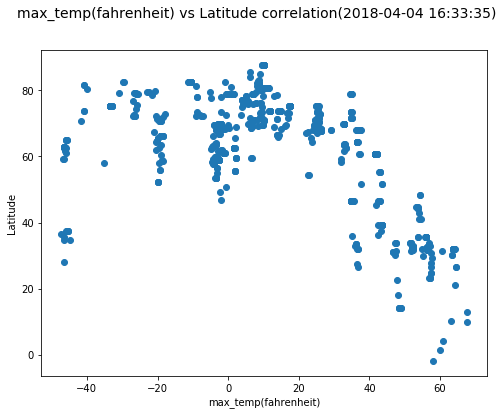

In [206]:
plot_it('Latitude','max_temp(fahrenheit)')

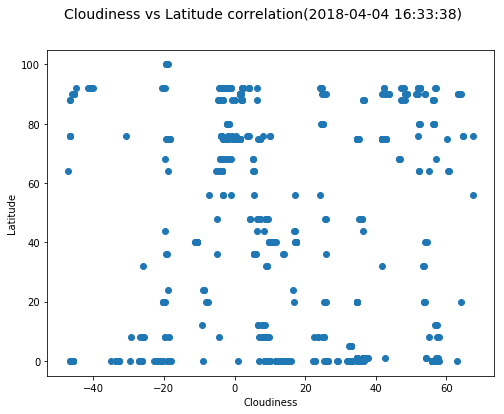

In [207]:
plot_it('Latitude','Cloudiness')

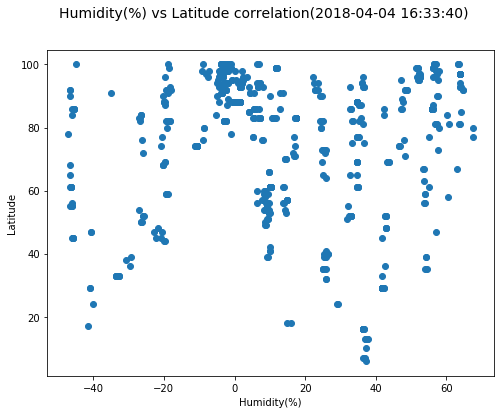

In [208]:
plot_it('Latitude','Humidity(%)')

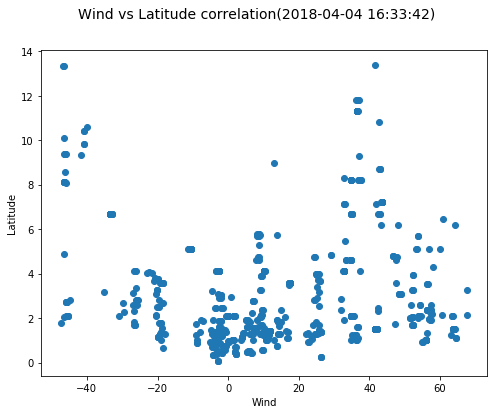

In [209]:
plot_it('Latitude','Wind')

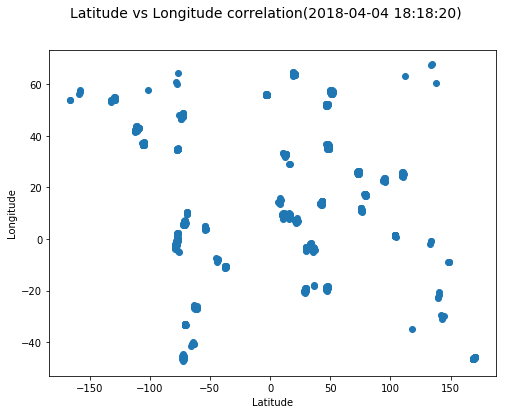

In [211]:
plot_it('Longitude', 'Latitude')

In [ ]:
plt.